In [162]:
from numpy import exp
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
class OutputEntity:
    def __init__(self, name_function: str, true_result: float, result: float, count_iterations: int, precision: float,
                 time: timedelta, mass_results: list[float]):
        self.name_function = name_function
        self.true_result = true_result
        self.result = result
        self.count_iterations = count_iterations
        self.precision = precision
        self.time = time
        self.results = mass_results

    def __str__(self):
        return (
            f"\nФункция:\t{self.name_function}\n"
            f"Desmos результат:\t{self.true_result}\nПолученный результат:\t{self.result}\n"
            f"Разница:\t{abs(self.true_result - self.result)}\n"
            f"Количество итераций:\t{self.count_iterations}\nИспользованная точность:\t{self.precision}\n"
            f"Затраченное время:\t{self.time}\n")

In [164]:
# В - 15
def func(x: float, deriv_s: int = 0):
    """
    Функция y = 2x− cos(x)

    При вводе аргумента deriv_s можно выбрать степень производной

    :param x: Точка
    :param deriv_s: Степень производной

    :return: Значение функции в точке x
    :rtype: float

    """
    if deriv_s == 1:
        return -exp(-x) + 2 * x
    return exp(-x) + x ** 2 - 2

In [165]:
def dichotomy(f, x_mass: list[float, float, float]) -> list[float, float, float]:
    mid = (x_mass[1] + x_mass[0]) / 2
    x_mass[2] = mid
    if f(mid) * f(x_mass[0]) < 0:
        x_mass[1] = mid
    else:
        x_mass[0] = mid
    return x_mass


def secant(f, x_mass: tuple[float, float, float]) -> float:
    """
    Метод хорд

    :param f: Функция
    :type f: function
    :param x_mass: Массив значений x, состоящий из левого края [0], правого края [1], и последнего значения [-1]

    :return: Значение x

    """
    x_prev = x_mass[-1]
    x_main = x_mass[0]
    return x_main - (f(x_main) * (x_prev - x_main)) / (f(x_prev) - f(x_main))


def newton(f, x_mass: tuple[float, float, float]) -> float:
    """

    :param f: Функция
    :type f: function
    :param x_mass: Массив значений x. Состоит из левого края [0], правого края [1], и последнего значения [-1]

    :return: Значение x

    """
    x_prev = x_mass[-1]
    return x_prev - f(x_prev) / f(x_prev, 1)


def get_result(function, mass_borders, eps) -> OutputEntity:
    """
    Получение результатов из функций

    :param function:
    :type function: function
    :param mass_borders:
    :param eps: Точность измерений

    :return: Различные параметры, полученные при вычислении корня.

    """
    mass_val = [mass_borders[0], mass_borders[1], mass_borders[-1]]
    end_mass = []
    delta = abs(mass_borders[0] - mass_borders[1])
    i = 0
    date_start = datetime.now()
    while delta > eps:
        x_cur = function(func, mass_val)
        # print(i := i + 1, mass_val[-1], x_cur)
        delta = abs(x_cur - mass_val[-1])
        mass_val[-1] = x_cur
        end_mass.append(x_cur)
    date_end = datetime.now()
    # print((date_end - date_start))
    return OutputEntity(function.__name__, -0.5373, mass_val[-1], i, eps, (date_end - date_start), end_mass)

In [166]:
range_mass = [-0.75, -0.25]  # Массив границ
eps = 1e-10
sec_res = get_result(secant, range_mass, eps)
new_res = get_result(newton, range_mass, eps)

delta = abs(range_mass[0] - range_mass[1])
mass_val = [range_mass[0], range_mass[1], range_mass[-1]]
mass_res = []
prev_stat = 1
i = 0
date_start = datetime.now()
while delta > eps:
    mass_val = dichotomy(func, mass_val)
    delta = abs(mass_val[-1] - prev_stat)
    print(i := i + 1, mass_val, delta)
    prev_stat = mass_val[-1]
    mass_res.append(prev_stat)
    if func(prev_stat) == 0:
        break
date_end = datetime.now()
dich_res = OutputEntity(dichotomy.__name__, -0.5373, prev_stat, i, eps, (date_end - date_start), mass_res)

print(sec_res, new_res, dich_res)

1 [-0.75, -0.5, -0.5] 1.5
2 [-0.625, -0.5, -0.625] 0.125
3 [-0.5625, -0.5, -0.5625] 0.0625
4 [-0.5625, -0.53125, -0.53125] 0.03125
5 [-0.546875, -0.53125, -0.546875] 0.015625
6 [-0.5390625, -0.53125, -0.5390625] 0.0078125
7 [-0.5390625, -0.53515625, -0.53515625] 0.00390625
8 [-0.5390625, -0.537109375, -0.537109375] 0.001953125
9 [-0.5380859375, -0.537109375, -0.5380859375] 0.0009765625
10 [-0.53759765625, -0.537109375, -0.53759765625] 0.00048828125
11 [-0.537353515625, -0.537109375, -0.537353515625] 0.000244140625
12 [-0.537353515625, -0.5372314453125, -0.5372314453125] 0.0001220703125
13 [-0.53729248046875, -0.5372314453125, -0.53729248046875] 6.103515625e-05
14 [-0.53729248046875, -0.537261962890625, -0.537261962890625] 3.0517578125e-05
15 [-0.5372772216796875, -0.537261962890625, -0.5372772216796875] 1.52587890625e-05
16 [-0.5372772216796875, -0.5372695922851562, -0.5372695922851562] 7.62939453125e-06
17 [-0.5372772216796875, -0.5372734069824219, -0.5372734069824219] 3.814697265625e

In [167]:
ds = pd.DataFrame(data=sec_res.results, columns=["Results"])
dn = pd.DataFrame(data=new_res.results, columns=["Results"])
dd = pd.DataFrame(data=dich_res.results, columns=["Results"])

In [168]:
ds

,Results
0,-0.495119
1,-0.531782
2,-0.536571
3,-0.537184
4,-0.537263
5,-0.537273
6,-0.537274
7,-0.537274
8,-0.537274
9,-0.537274


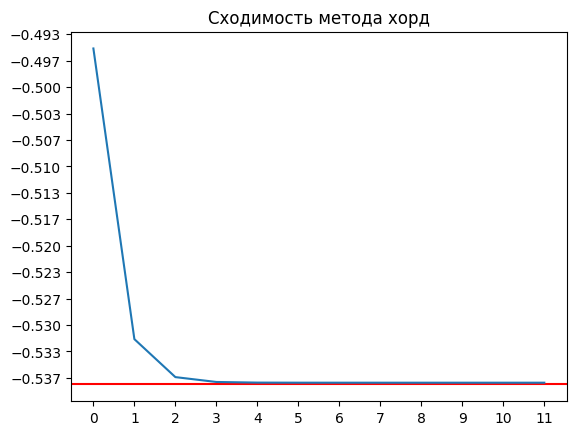

In [201]:
ax = plt.gca()
ax.axhline(y=-0.5375, color='r')
plt.xticks([i for i in range(0, 12, 1)])
plt.yticks([-i / 300 for i in range(0, 1000)])
plt.title("Сходимость метода хорд")
plt.plot(ds)

In [169]:
dn

,Results
0,-0.616292
1,-0.541125
2,-0.537284
3,-0.537274
4,-0.537274


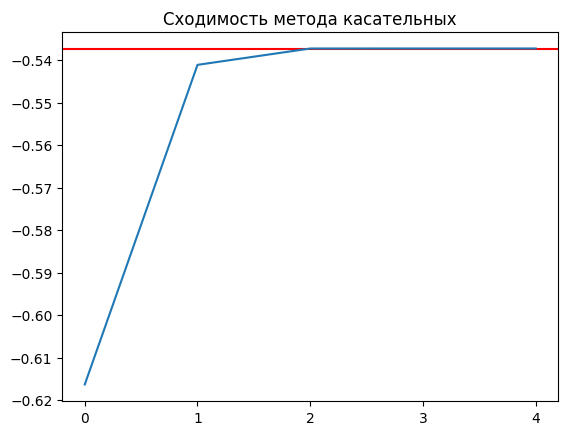

In [225]:
ax = plt.gca()
ax.axhline(y=-0.5375, color='r')
plt.xticks([i for i in range(0, 12, 1)])
plt.yticks([-i / 100 for i in range(-100, 550)])
plt.title("Сходимость метода касательных")
plt.plot(dn)

In [170]:
dd

,Results
0,-0.500000
1,-0.625000
2,-0.562500
3,-0.531250
4,-0.546875
5,-0.539062
6,-0.535156
7,-0.537109
8,-0.538086
9,-0.537598


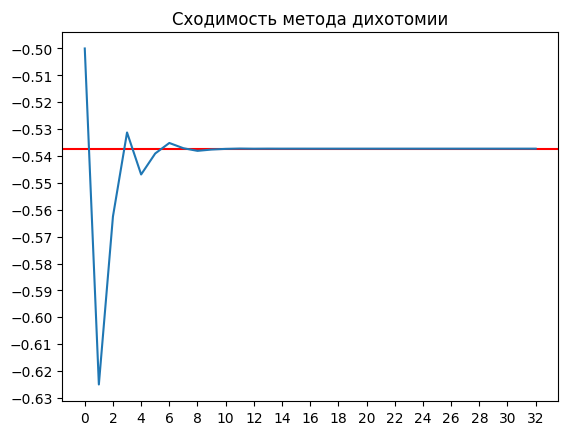

In [226]:
ax = plt.gca()
ax.axhline(y=-0.5375, color='r')
plt.xticks([i for i in range(0, 33, 2)])
plt.yticks([-i / 100 for i in range(-5, 500)])
plt.title("Сходимость метода дихотомии")
plt.plot(dd)

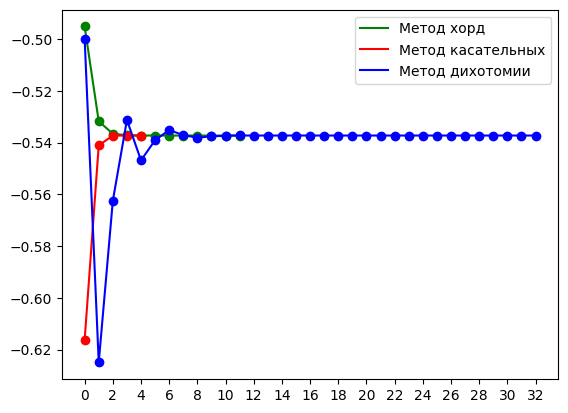

In [171]:
plt.xticks([i for i in range(0, 34 + 1, 2)])
plt.plot(ds['Results'], 'g', label="Метод хорд")
plt.plot(ds['Results'], 'go')
plt.plot(dn['Results'], 'r', label="Метод касательных")
plt.plot(dn['Results'], 'ro')
plt.plot(dd['Results'], 'b', label="Метод дихотомии")
plt.plot(dd['Results'], 'bo')
plt.legend()
plt.show()

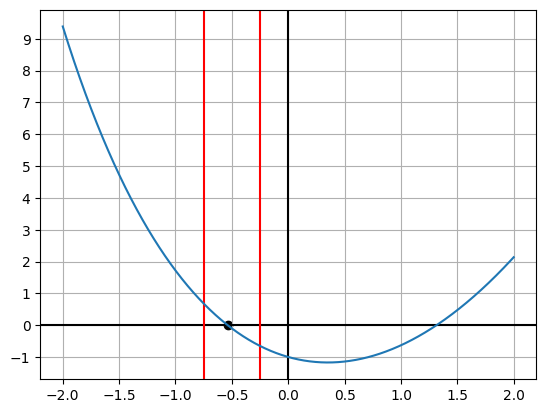

In [172]:
x = np.linspace(-2, 2, int(1e6))
plt.grid()
plt.xticks([i / 2 for i in range(-2 * 2, (2 + 1)* 2, 1)])
plt.yticks([i for i in range(-20, 20 + 1, 1)])
y = func(x)
ax = plt.gca()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axvline(x=-0.75, color='r')
ax.axvline(x=-0.25, color='r')
plt.scatter(-0.5373, 0, color='black')
plt.plot(x, y)